<a href="https://colab.research.google.com/github/rromao-DS/MVP_SPRINT_01/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas - SPRINT 01

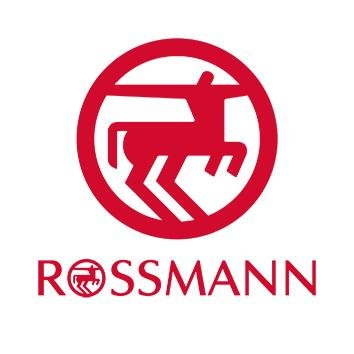

A Rossmann é uma das maiores cadeias de farmácias da Europa, com cerca de 56.200 funcionários e mais de 4000 lojas. Em 2019, Rossmann teve mais de €10 bilhões em vendas na Alemanha, Polônia, Hungria, República Tcheca, Turquia, Albânia, Kosovo, Israel e Espanha.

## Contexto do Desafio 

> O CFO fez uma reunião com todos os Gerentes de Loja e pediu para que cada um deles trouxesse uma previsão diária das próximas **6** semanas de vendas. As vendas nas lojas são influenciadas por muitos fatores, incluindo promoções, competição, feriados escolares e estaduais, sazonalidade e localidade. 

Referência: https://www.kaggle.com/competitions/rossmann-store-sales/data

###Informações sobre as Features e os arquivos do Dataset 

- **train.csv** - Dado histórico incluindo vendas.
- **test.csv** - Dado histórico excluindo vendas. 
- **store.csv** - Informação adicional sobre as lojas. 


1. **Id** - Um ID que representa duplamente (Loja, Data) dentro do conjunto de testes;
2. **Store** - Um ID exclusivo para cada loja;
3. **Sales** - O volume de negócios para qualquer dia - isso é o que eu estou prevendo;
4. **Customers** - O número de clientes em um determinado dia.
5. **Open** - Um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta;
6. **StateHoliday** - Indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, estão fechadas nos feriados estaduais. Observe que todas as escolas estão fechadas em feriados e fins de semana. a = feriado, b = feriado de Páscoa, c = Natal, 0 = Nenhum;
7. **SchoolHoliday** - Indica se o  ID (Loja, Data) foi afetado pelo fechamento de escolas públicas;
8. **StoreType** - Existem 4 tipos de modelos de lojas: a, b, c, d
9. **Assortment** - Descreve um nível de variedade: a = básico, b = extra, c = estendido;
10. **CompetitionDistance** - Distância em metros até a loja concorrente mais próxima;
11. **CompetitionOpenSince[Month/Year]** - Fornece o ano e o mês aproximados da hora em que o concorrente mais próximo foi aberto;
12. **Promo** - Indica se uma loja está executando uma promoção naquele dia;
13. **Promo2** - Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando;
14. **Promo2Since[Year/Week]** - Descreve o ano e a semana do calendário em que a loja começou a participar da Promo2;
15. **PromoInterval** - Descreve os intervalos consecutivos que o Promo2 é iniciado, nomeando os meses em que a promoção é iniciada novamente. Por exemplo. "Fev, Maio, Agosto, Novembro" significa que cada rodada começa em fevereiro, maio, agosto e novembro de qualquer ano para essa loja.



## Metodologia Utilizada 

> CRISP-DM (Cross Industry Standard Process for Data Mining )

É uma metodologia ágil, sendo de grande utilidade em cenários de incerteza na hora de resolver problemas de negócio e que se difere da KDD que abordamos no curso que tem como caracteristica a obtenção de conhecimento. Também, nos apresenta uma bela visão do ciclo de vida dos dados, contando uma história sobre o projeto de dados com suas fases.


1. Entendimento do negócio;
2. Coleta dos dados;
3. Limpeza dos dados;
4. Exploração dos dados;

Essas são as fases que perpassaremos durante o desenvolvimento do MVP.

Obs.: Existem outras fases que serão abordadas em um outro momento. 



# Importando as Bibliotecas

Essas são os pacotes e módulos que trabalharemos durante esta Sprint:

- math: é um módulo embutido do Python que fornece funções matemáticas básicas, como trigonometria, exponenciação e arredondamento.
- pickle: é um módulo do Python que permite serializar objetos Python em bytes e desserializá-los novamente em objetos Python.
- warnings: é um módulo embutido do Python que permite gerar avisos durante a execução do programa. Esses avisos podem ser úteis para depuração e para alertar o usuário sobre problemas potenciais.
- datetime: é um módulo do Python que fornece classes para trabalhar com datas e horários. Ele permite que você crie objetos de data e hora, manipule datas e horários, formate datas e horários e muito mais.
- inflection: é uma biblioteca Python que fornece funções para transformar palavras de um formato para outro. Por exemplo, ele pode ser usado para transformar uma string em formato "snake_case" em uma string em formato "CamelCase".
- numpy: é uma biblioteca para Python que fornece funções matemáticas avançadas e operações em matrizes e vetores. É frequentemente usada em ciência de dados, aprendizado de máquina e análise numérica.
- pandas: é uma biblioteca para Python que fornece estruturas de dados e ferramentas de análise de dados de alta performance. É frequentemente usada para trabalhar com dados tabulares, como planilhas e bancos de dados.
- seaborn: é uma biblioteca de visualização de dados para Python baseada no matplotlib. Ele fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
- matplotlib.gridspec: é um módulo do matplotlib que permite criar layouts complexos de subplots em uma única figura.
- matplotlib.pyplot: é um módulo do matplotlib que fornece uma interface de alto nível para a criação de gráficos e visualizações. Ele permite que você crie gráficos em uma variedade de estilos e formatos.

Já o RobustScaler, MinMaxScaler e LabelEncoder são técnicas de pré-processamento de dados usadas na análise de dados e aprendizado de máquina.

 > RobustScaler: é uma técnica de pré-processamento de dados que é usada para dimensionar os dados de modo que os outliers tenham menos influência no resultado final. Ele dimensiona os dados de forma que o intervalo interquartil (IQR) dos dados seja escalonado para uma escala padrão, tornando a distribuição dos dados menos sensível a valores extremos.

> MinMaxScaler: é uma técnica de pré-processamento de dados que é usada para dimensionar os dados em uma escala específica. Ele transforma os dados em um intervalo específico, geralmente entre 0 e 1. Isso é útil quando se deseja comparar valores em diferentes escalas ou quando se deseja reduzir o impacto de valores extremos.

> LabelEncoder: é uma técnica de pré-processamento de dados usada para codificar valores categóricos em valores numéricos. Ele atribui um valor numérico a cada valor único na coluna de dados categóricos, permitindo que o modelo de aprendizado de máquina trabalhe com esses dados. Por exemplo, se houver uma coluna "cor" com valores "vermelho", "verde" e "azul", o LabelEncoder atribuirá valores numéricos a cada uma dessas cores, como "vermelho"=0, "verde"=1 e "azul"=2.

In [74]:
pip install inflection


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import math
import pickle
import warnings
import datetime
import inflection

import numpy               as np
import pandas              as pd
import seaborn             as sns
import matplotlib.gridspec as gridspec

from matplotlib            import pyplot as plt
from scipy                 import stats  as ss
from sklearn.preprocessing import StandardScaler

from tabulate              import tabulate

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder # 

warnings.filterwarnings( 'ignore' ) 



# Funções Auxiliares


Crei essa categoria para ajudar a modularizar os códigos e torná-los mais fáceis de entender, manter e reutilizar. Em vez de escrever todo o código dentro de um único bloco, eu dividi o código em algumas funções menores para realizar tarefas específicas.

**Função Cramer's V**

 entre duas variáveis categóricas x e y.

Essa função é uma medida de associação entre duas variáveis categóricas que varia de 0 a 1, onde 0 indica nenhuma associação e 1 indica associação completa. É uma medida de similaridade entre duas distribuições categóricas e é calculado a partir de uma tabela de contingência, que é uma tabela que mostra a frequência de cada combinação possível de valores entre duas variáveis categóricas.

A função está usando o pacote Pandas para criar uma tabela de contingência a partir das variáveis x e y, e então usa o pacote SciPy para realizar um teste qui-quadrado de independência entre as variáveis. O valor de qui-quadrado é então corrigido para considerar o tamanho da amostra e o número de categorias de cada variável, e o resultado final é retornado como o coeficiente de associação Cramer's V. 

> Conseguiremos visualizar melhor na Análise Multivariada dos Atributos Categóricos seção 4.3.2 do presente trabalho. 

In [76]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


# Carregando os dados

Os códigos abaixo carregam dois arquivos CSV em dois DataFrames do Pandas, df_store_raw e df_sales_raw. O primeiro arquivo contém informações sobre as lojas, enquanto o segundo arquivo contém informações sobre as vendas diárias em cada loja (como data da venda, número de vendas, receita, etc.).

Em seguida, o código mescla os dois DataFrames em um único DataFrame chamado df_raw, usando o método merge do Pandas. A mesclagem é feita com base na coluna "Store", que é comum a ambos os DataFrames. O parâmetro how='left' indica que todos os registros do DataFrame df_sales_raw devem ser incluídos no DataFrame resultante, mesmo que não haja correspondência na coluna "Store" do DataFrame df_store_raw.

O resultado final será um único DataFrame que contém todas as informações sobre as vendas diárias e as lojas correspondentes. 

In [77]:
# Carregando os dados de venda e os dadso historicos sem as vendas com informações relevante para as análises 
df_store_raw = pd.read_csv('/content/drive/MyDrive/MVP/store.csv', low_memory=False)
df_sales_raw = pd.read_csv( '/content/drive/MyDrive/MVP/train.csv', low_memory=False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

In [78]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. PASSO 01 - DESCRICAO DOS DADOS

Estou usando o código abaixo para poder exibir informações sobre o DataFrame como número de valores não nulo, o tipo de dados de cada coluna do DF, o uso da memória do DF e o número de colunas e linhas totais. Isso me ajudará a ter um overview dos dados que estarei trabalhando daqui em diante.  

In [79]:
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308219 entries, 0 to 308218
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      308219 non-null  int64  
 1   DayOfWeek                  308218 non-null  float64
 2   Date                       308218 non-null  object 
 3   Sales                      308218 non-null  float64
 4   Customers                  308218 non-null  float64
 5   Open                       308218 non-null  float64
 6   Promo                      308218 non-null  float64
 7   StateHoliday               308218 non-null  object 
 8   SchoolHoliday              308218 non-null  float64
 9   StoreType                  308219 non-null  object 
 10  Assortment                 308219 non-null  object 
 11  CompetitionDistance        307429 non-null  float64
 12  CompetitionOpenSinceMonth  210202 non-null  float64
 13  CompetitionOpenSinceYear   21

- Decidi fazer uma cópia do DF original para evitar que efetuasse qualquer modificação no dado original durante a limpeza dos dados. 

In [80]:
df1 = df_raw.copy()

## 1.1 Rename columns 

O código abaixo é responsável por converter os nomes das colunas de um formato CamelCase para snake_case.

A primeira linha define uma lista com os nomes das colunas em formato CamelCase.

A segunda linha define uma função lambda que utiliza a biblioteca Inflection para converter o nome de uma coluna em formato CamelCase para snake_case.

A terceira linha aplica a função lambda em cada elemento da lista de colunas antigas usando a função map() e cria uma nova lista com os nomes das colunas em snake_case.

Fiz isso para padronizar os nomes das colunas em um formato mais legível e fácil de trabalhar, além de facilitar a compatibilidade com outras bibliotecas.

In [81]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

In [82]:
# rename

df1.columns = cols_new

## 1.2. Data Dimensions

Os códigos abaixo são praticamente auto explicativos, para entendermos o tamanho de linhas e colunas que estamos trabalhando. Importante lembrar que mais features serão criadas na etapa do Feature Engineering 

In [83]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 308219
Number of Cols: 18


## 1.3. Data Types

Nesse momento, já modifiquei com a biblioteca Pandas o Tipo de variavel para Datetime e abaixo verifico quais os tipos de todos os atributos que trabalharemos 

In [84]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                            float64
date                            datetime64[ns]
sales                                  float64
customers                              float64
open                                   float64
promo                                  float64
state_holiday                           object
school_holiday                         float64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

Chegagem de quantidade de NAs que existrem no Dataset. 

In [85]:
df1.isna().sum()


store                                0
day_of_week                          1
date                                 1
sales                                1
customers                            1
open                                 1
promo                                1
state_holiday                        1
school_holiday                       1
store_type                           0
assortment                           0
competition_distance               790
competition_open_since_month     98017
competition_open_since_year      98017
promo2                               0
promo2_since_week               155290
promo2_since_year               155290
promo_interval                  155290
dtype: int64

## 1.5. Fillout NA

Neste Snippet estou preenchendo os valores dos NAs existentes. 

No Competition Distance identifiquei o maior valor existente no dataset deste atributo e inferi que se não há informação seria por conta da distancias da loja e coloquei como valor default para os NAs encontrados. 

Nas outras colunas [competition_open_since_month, competition_open_since_year, promo2_since_week, promo2_since_year] estou utilizando a coluna date para susbtituir os dados. 


Já a feature Promo_interval eu decidi criar um dicionário e enumerar os meses do ano e utilizei a feature date e o método - MAP - para buscar dentro da feature Date os meses correspondentes com base nesse dicionario.Além disso, preenci o NA com 0. 



In [86]:
#competition_distance        
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo2_since_week           
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year           
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#promo_interval              
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )


df1.isna().sum()

store                           0
day_of_week                     1
date                            1
sales                           1
customers                       1
open                            1
promo                           1
state_holiday                   1
school_holiday                  1
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    1
competition_open_since_year     1
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       1
is_promo                        0
dtype: int64

Como alguns NAs não foram preenchido decidi utilizar a mediana para preenchê-los

In [87]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].fillna(df1['competition_open_since_month'].median())
df1['competition_open_since_year'] = df1['competition_open_since_year'].fillna(df1['competition_open_since_year'].median())


In [88]:
df1.isna().sum()

store                           0
day_of_week                     1
date                            1
sales                           1
customers                       1
open                            1
promo                           1
state_holiday                   1
school_holiday                  1
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       1
is_promo                        0
dtype: int64

## 1.6. Change Data Types

Aqui estou efetuando a mudando de tipo dos dados para Integer. Isso me ajudará a diminuir o uso da memória e melhorar a performance para alguns tipos de operações 

In [89]:
# competiton
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistics

Nesta Seção efetuarei a análise descritiva do dataset com o objetivo de entender suas características e padrões, identificar possíveis problemas ou inconsistências nos dados, e obter insights que possam orientar a tomada de decisões ou a definição de hipóteses para análises posteriores.  

Decidi utilizar o método do Pandas ".select_dtypes()" que seleciona colunas em um DataFrame com base nos tipos de dados das colunas. Ele retorna um novo DataFrame contendo apenas as colunas que correspondem aos tipos de dados especificados.

Porém, estamos trabalhando com dados categóricos e númericos. Por essa razão, abaixo estou dividindo-os em duas variáveis. 

- num_attributes 
- cat_attributes

In [90]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Atributes

Estes códigos realizam uma análise descritiva das variáveis numéricas do conjunto de dados, calculando medidas de tendência central (média e mediana) e medidas de dispersão (desvio padrão, mínimo, máximo, amplitude, assimetria e curtose) para cada variável.

Foram calculadas as medidas de tendência central e dispersão usando as funções mean(), median(), std(), min(), max(), skew() e kurtosis(), que são funções do pacote NumPy.

Depois que as medidas foram calculadas, elas foram concatenadas em um dataframe com o nome de m, com as colunas representando as medidas de cada variável numérica.



In [91]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.355689,558.0,321.831783,-0.000702,-1.200160
1,day_of_week,1.0,7.0,6.0,4.003618,NaN,1.994167,-0.004986,-1.241098
2,sales,0.0,41551.0,41551.0,5993.145994,NaN,3961.418488,0.568196,1.519275
3,customers,0.0,5458.0,5458.0,637.858577,NaN,466.406418,1.599578,7.138470
4,open,0.0,1.0,1.0,0.828446,NaN,0.376992,-1.742464,1.036187
5,promo,0.0,1.0,1.0,0.398500,NaN,0.489589,0.414633,-1.828091
6,school_holiday,0.0,1.0,1.0,0.158339,NaN,0.365059,1.871821,1.503725
7,competition_distance,20.0,200000.0,199980.0,5938.767597,2330.0,12509.176178,10.215415,147.688729
8,competition_open_since_month,1.0,12.0,11.0,6.738498,7.0,3.391307,0.017983,-1.276448
9,competition_open_since_year,1900.0,2015.0,115.0,2010.627732,2012.0,5.648435,-6.409757,105.685374


A tabela acima  apresenta as estatísticas descritivas das variáveis numéricas presentes no dataset. A partir desses valores, podemos observar que:

A variável store possui um range (diferença entre o valor máximo e mínimo) de 1114, o que significa que há uma grande variação entre os valores presentes nessa variável.

A média de vendas (sales) diárias é de aproximadamente $5993, com um desvio padrão de 3961, indicando uma alta variabilidade nos valores diários. Além disso, conseguimos ver que a media e a mediana deste atributo está muito proximo de uma distribuição normal. 

A média de clientes (customers) diários é de aproximadamente 637, com um desvio padrão de 466, o que também indica uma alta variabilidade nos valores diários.

A variável competition_distance possui uma média de 5938 metros, com um desvio padrão de 12509 metros, indicando uma grande variação nos valores.

A média de promoções (promo) ativas diariamente é de 0.39, ou seja, em média há promoções ativas em cerca de 39% dos dias.

A variável school_holiday possui uma média de 0.16, ou seja, em média há feriados escolares em cerca de 16% dos dias.

As variáveis competition_open_since_month e competition_open_since_year possuem uma média de 6.74 e 2010.63, respectivamente, o que pode indicar que a maioria das competições próximas às lojas foi aberta por volta de junho e que a maioria das competições existe há cerca de 11 anos.

A variável promo2 possui uma média de 0.49, indicando que promoções de tipo 2 (promoções contínuas) estão ativas em cerca de 49% dos dias.

As variáveis promo2_since_week e promo2_since_year possuem uma média de 23.38 e 2013.26, respectivamente, o que pode indicar que a maioria das promoções de tipo 2 foram iniciadas por volta da semana 23 e no ano de 2013.


Conseguimos ver que será necessario colocarmos e uma escala mais legivel para podermos interpretar os dados. 




<Axes: xlabel='sales', ylabel='Density'>

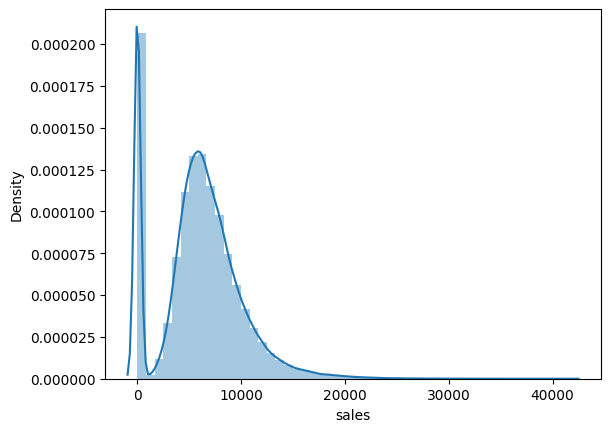

In [92]:
sns.distplot( df1['sales'])

### 1.7.2. Categorical Atributes

Neste momento analisarei os Atributos categóricos e no código abaixo estou contando quantos valores únicos há em cada coluna do DataFrame.

In [93]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      5
store_type         4
assortment         3
promo_interval     4
month_map         11
dtype: int64

- No primeiro boxplot, que mostra as vendas em diferentes tipos de feriado no estado, podemos ver que as vendas no tipo de feriado "B" são maiores que as do tipo "A" e "C". No entanto, a mediana (que é o valor que separa os dados em duas partes iguais) está mais próxima do tipo "C". Além disso, podemos observar que as vendas estão equilibradas entre o quartil 25 ao 50 e do quartil 50 ao 75, ou seja, há uma distribuição uniforme das vendas entre esses intervalos

- Quando olhamos para o segundo boxplot a loja do tipo B tiveram um desempenho melhor em termos de vendas do que as outras lojas. Além disso, a presença de um grande número de outliers indica que algumas lojas do tipo B tiveram vendas excepcionalmente altas. Já as lojas do tipo C tiveram uma mediana de vendas mais alta do que as outras lojas, mas houve menos lojas com vendas em torno da mediana. Isso pode indicar que as lojas do tipo C têm potencial para aumentar suas vendas, mas há uma grande variação entre as lojas.

-  No terceiro boxplot, podemos observar que o Assortment B tem uma distribuição mais uniforme dos dados em torno da mediana, com menos valores discrepantes (outliers) do que o Assortment A, que apresenta uma maior dispersão dos dados, com mais valores discrepantes acima e abaixo da mediana.

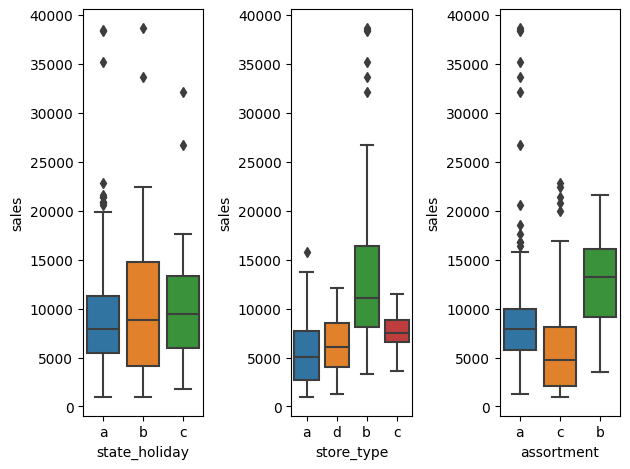

In [116]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

plt.tight_layout()


# 2.0. PASSO 02 - FEATURE ENGINEERING

In [95]:
df2 = df1.copy()

## 2.4. Feature Engineering

Nesse momento é o processo de criação de novas variáveis com base nas variáveis existentes em no dataset que carreguei acima. Entendi que a partir da variável date poderia trazer novas features que seriam válidas para análise e maior conhecimento do negócio. 

Então, criei aqui, a partir da feature ['date'] as seguintes colunas:

- Year;
- Month;
- day;
- Week_of_year (contendo o número da semana do ano) que retornará um valor numérico que poderei realizar operações matemáticas e cálculos;
- Year_week (contendo o ano e o número da semana concatenados) retornará uma string que poderei utiliar para fazer visualização e para agrupar dados por período;
- Competition_Since indicará a data em que cada loja começou a competir com a loja concorrente mais próxima;
- Competition_Time_Month indicará o número de meses desde o início da competição com a loja concorrente mais próxima.
- Promo_Since indicará a semana em que cada loja começou a participar da promoção Promo2.
- Promo_Time_Week indicará o número de semanas desde o início da promoção Promo2.

Além disso, nesse snippet temos algumas coversões ocorrendo no código como no assortment, promo_since e etc. 

In [96]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days )
df2['competition_time_month'] = df2['competition_time_month'].fillna(df2['competition_time_month'].median().astype(int))

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days )
df2['promo_time_week'] = df2['promo_time_week'].fillna(df2['promo_time_week'].median().astype( int ))

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS


In [97]:
df3 = df2.copy()


## 3.1. Filtragem das Linhas


In [98]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]


## 3.2. Selecao das Colunas


In [99]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS


In [100]:
df4 = df3.copy()


## 4.1. Analise Univariada


### 4.1.1. Response Variable



Abaixo, temos um grafico que é similar há uma distribuição normal, porém ela não é. Essa análise de identificarmos como é a distribuição da variável reposta se deve no futuro ao modelo de machine learning que iremos aplicar. Para ML é extremamente importante que os dados sejam independetes e sejam normalmente distribuidos. Quanto mais normal ela for melhor o algoritmo performará. 

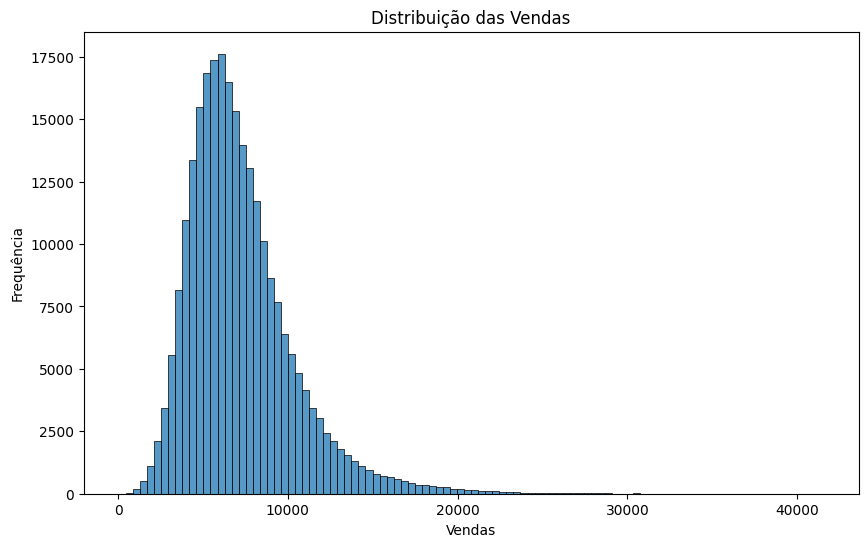

In [120]:

# cria figura e define tamanho
plt.figure(figsize=(10,6))

# plota o histograma com tamanho de bins igual a 100
sns.histplot(df4['sales'], bins=100, kde=False)

# adiciona título e rótulos aos eixos
plt.title('Distribuição das Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')

# exibe o gráfico
plt.show()


### 4.1.2. Numerical Variable


Nos gráficos abaixo conseguimos ver alguns comportamentos que a variavel resposta apresenta. Isso é importante, pois mais explicativa ela esta se tornando. Se olharmos para a Feature Competition Open Since Month, podemos ver o comportamento das lojas em relacao a venda desde a abertura. Ela explica um pouco o fenomeno. Diferente da feature Day of week, que nao há variabilidade sozinha, talvez comparada a outra variavel ela nos traz alguma informacao.

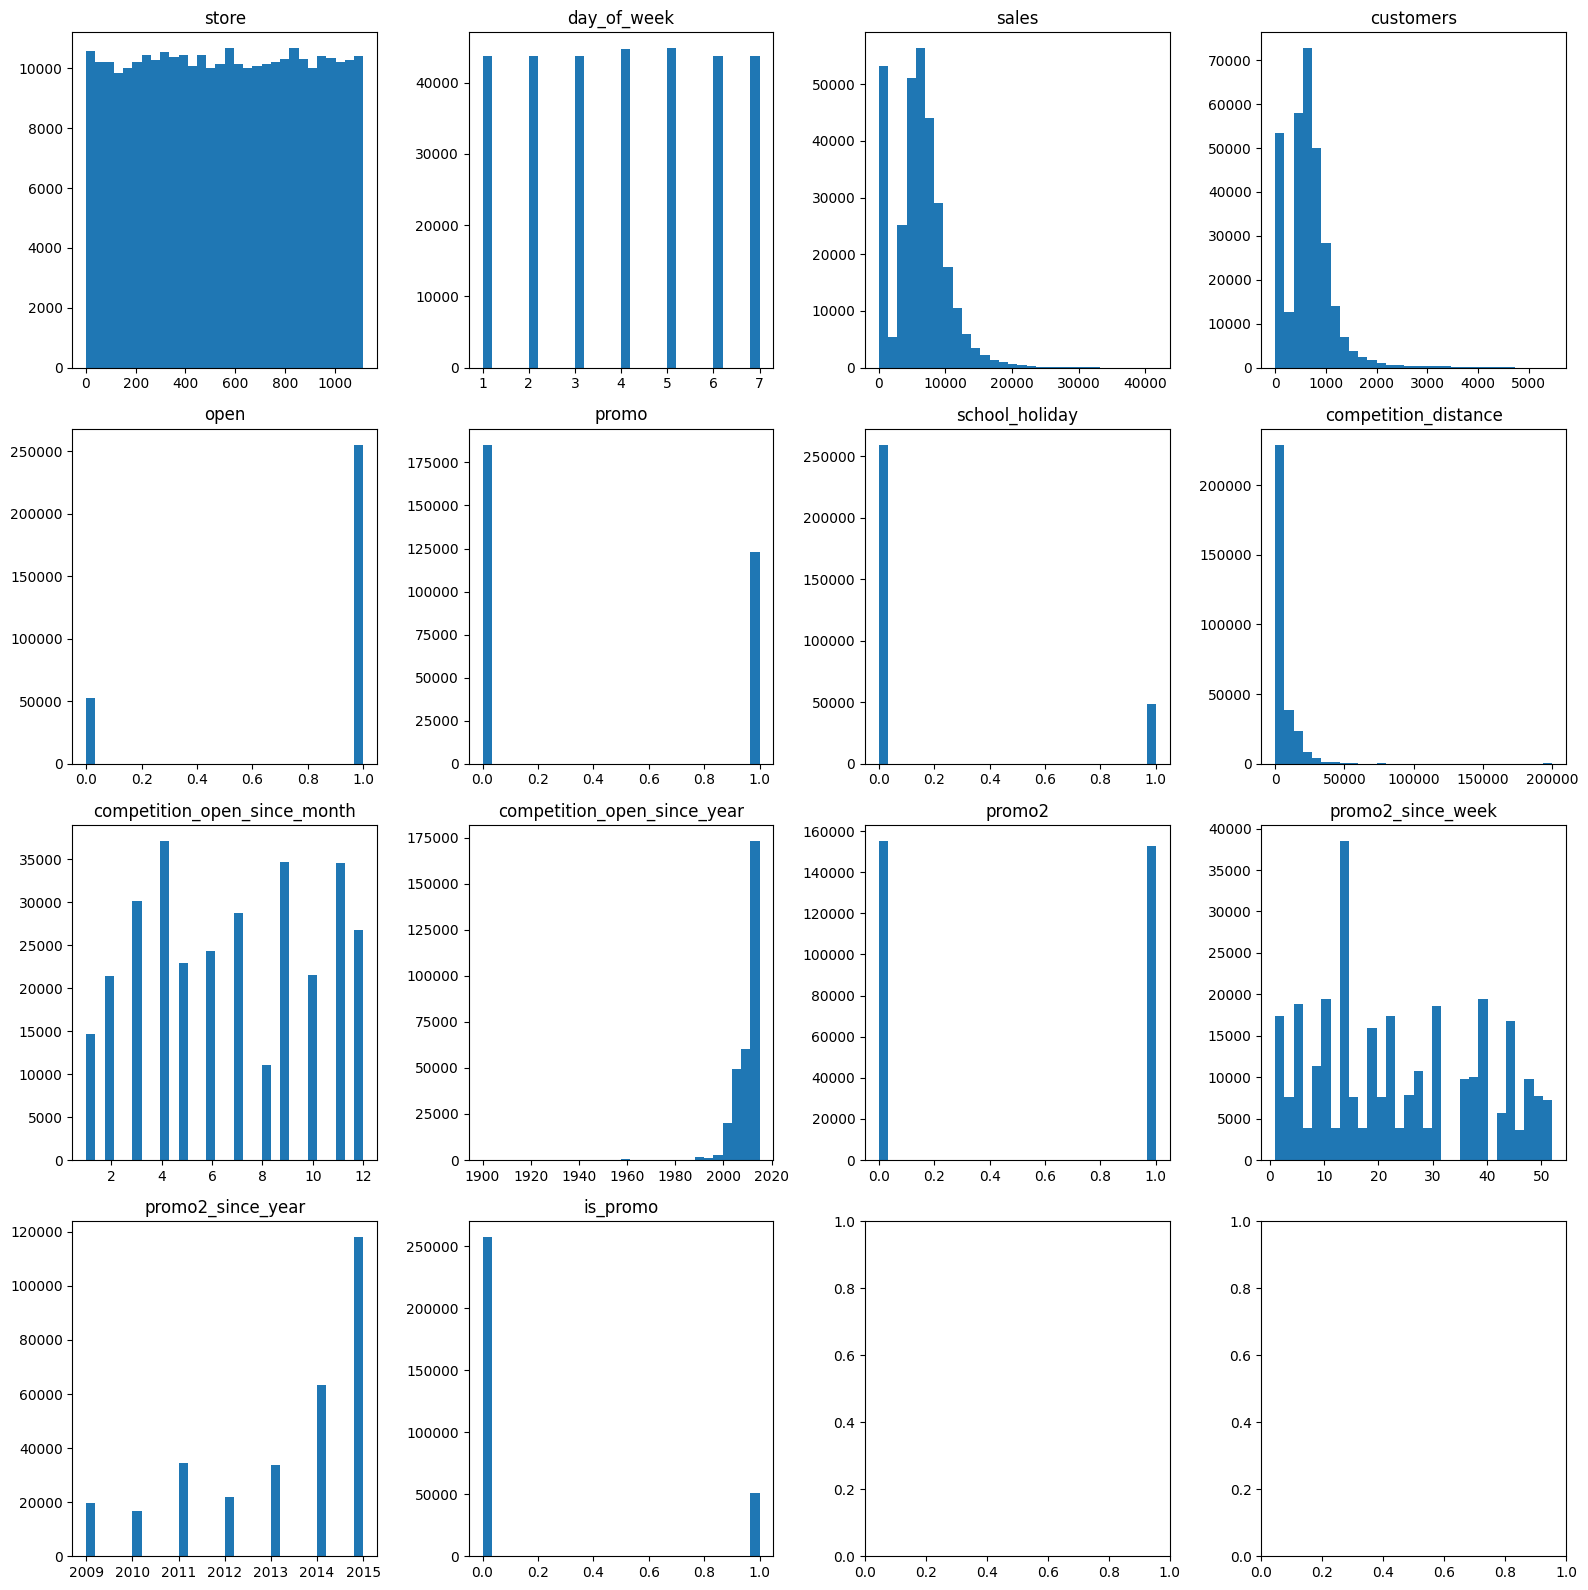

In [119]:

# cria uma figura com uma matriz de subplots de 4x4
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16,16))

# itera sobre as colunas e linhas dos subplots e plota o histograma correspondente
for i, ax in enumerate(axs.flat):
    if i < len(num_attributes.columns):
        col = num_attributes.columns[i]
        ax.hist(num_attributes[col], bins=30)
        ax.set_title(col)

# ajusta o espaçamento entre os subplots
plt.tight_layout()

# exibe o gráfico
plt.show()


### 4.1.3. Categorical Variable


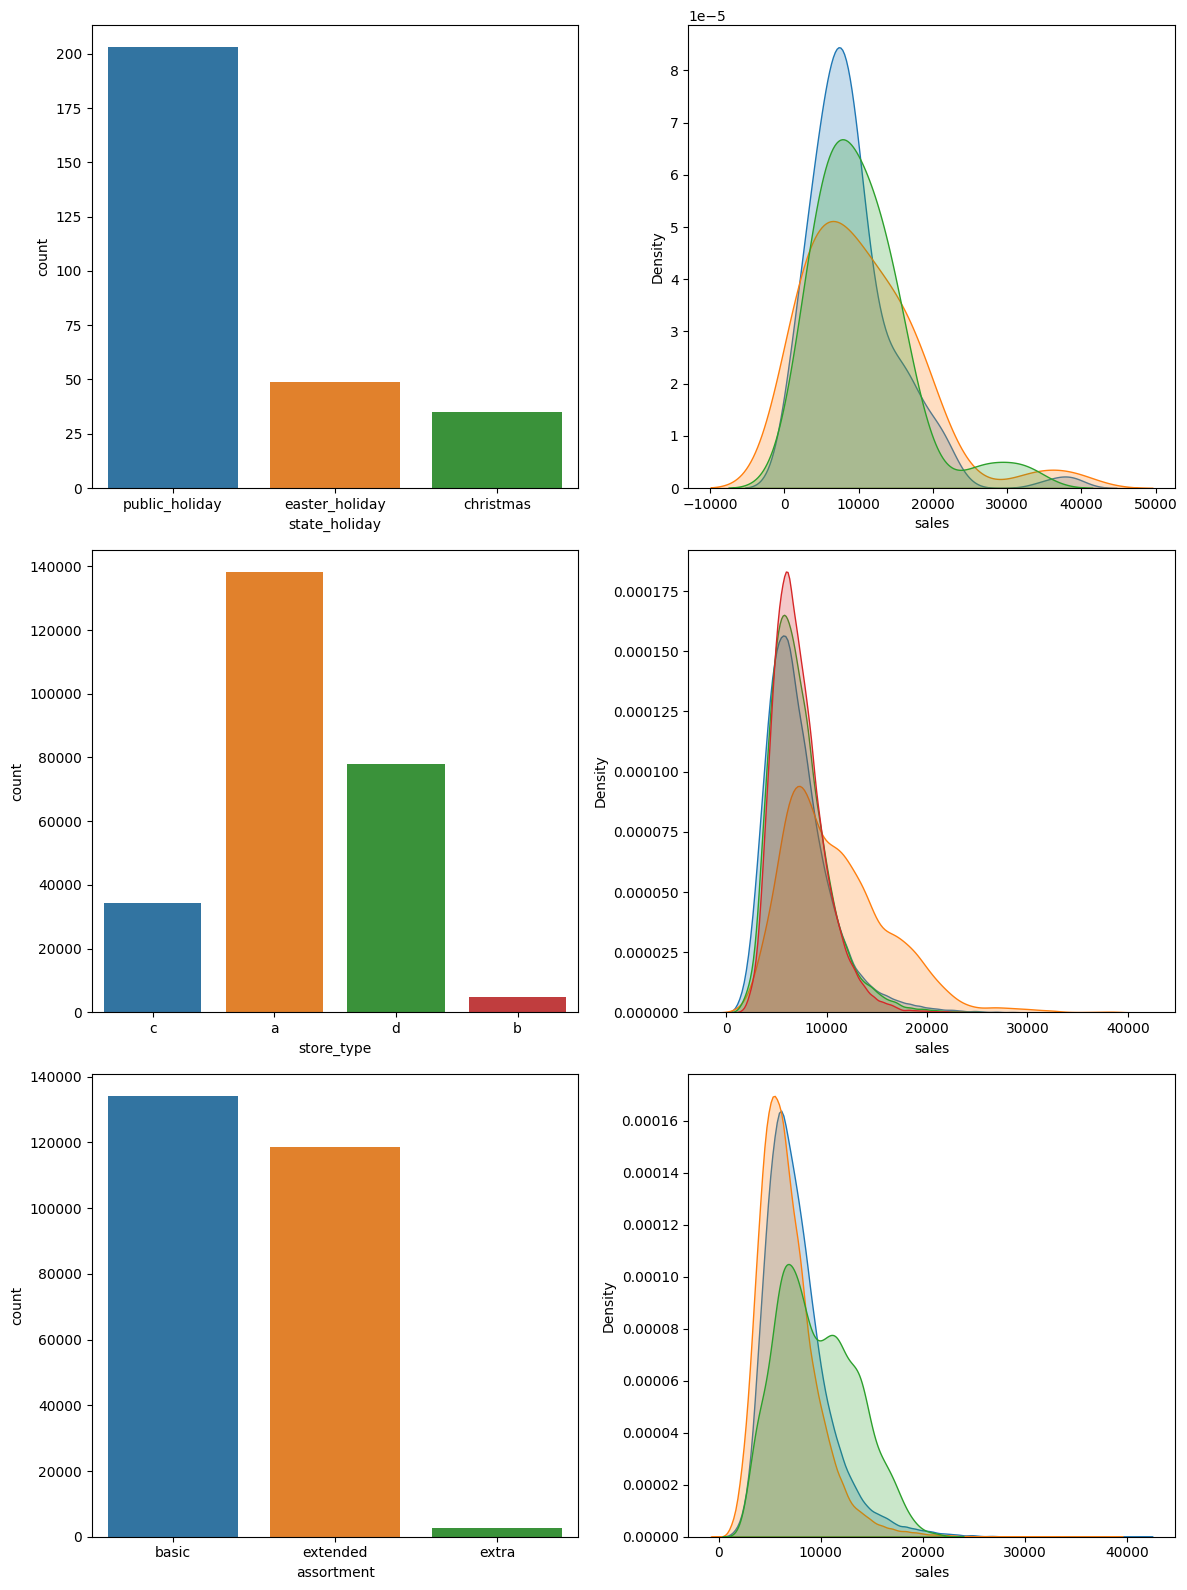

In [129]:
plt.figure(figsize=(12, 16))

# state_holiday
plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x=a['state_holiday'])

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot(x=df4['store_type'] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot(x = df4['assortment'] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True )

plt.tight_layout()



## 4.2. Analise Bivariada


Nesta Parte eu criei algumas hipoteses de perguntas para o negócio afim de ir respondendo e criando um entendimento maior sobre o negócio

### **H1**. Lojas com maior sortimentos deveriam vender mais.

**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.



<Axes: xlabel='year_week'>

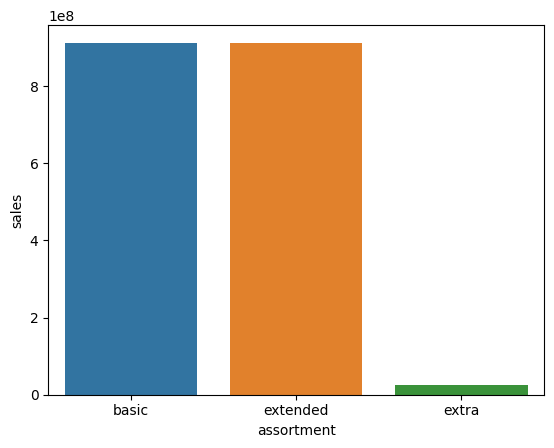

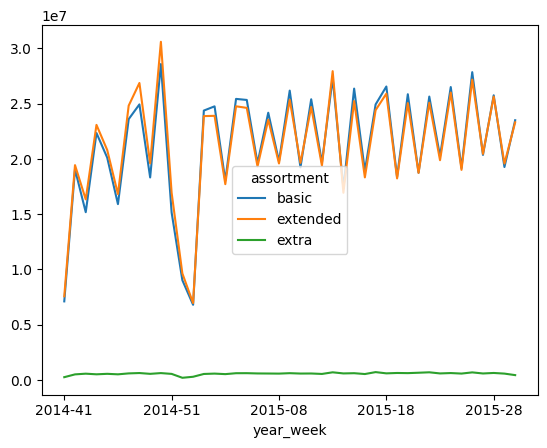

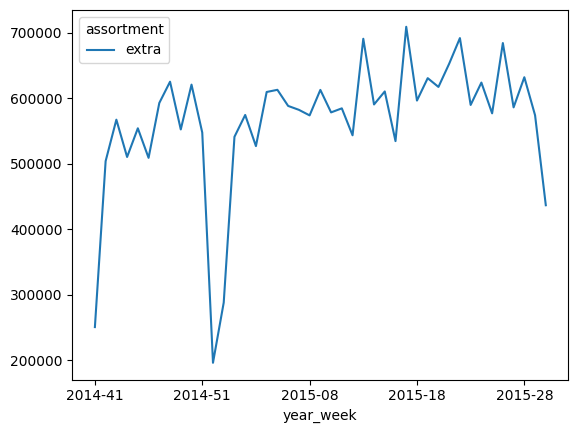

In [104]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

### **H2**. Lojas com competidores mais próximos deveriam vender menos.

**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS

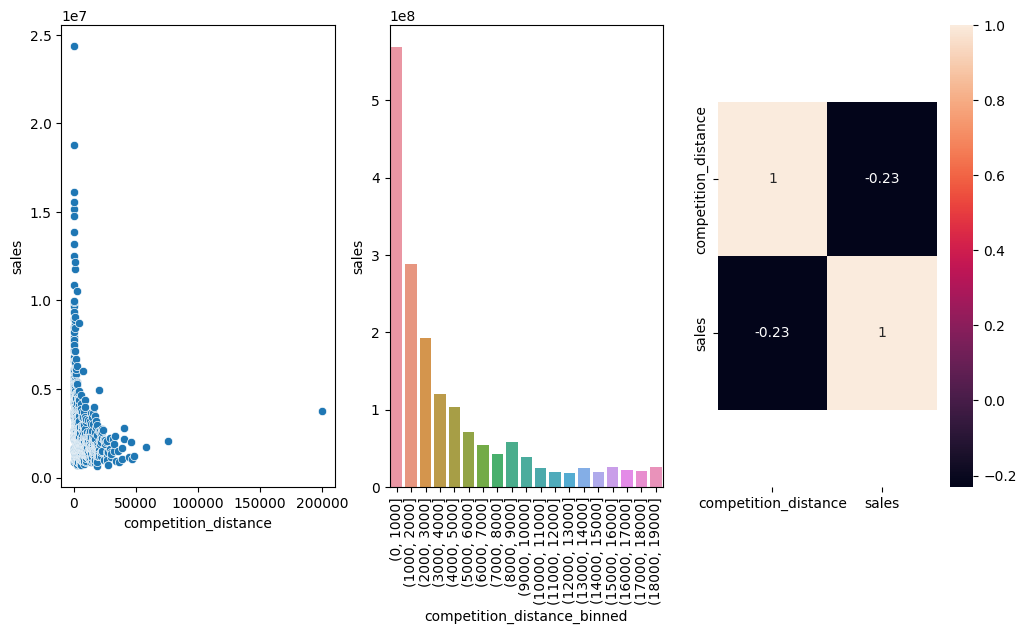

In [132]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );



### **H3** Lojas com competidores à mais tempo deveriam vendem mais.

**FALSA** Lojas com COMPETIDORES À MAIS TEMPO vendem MENOS.

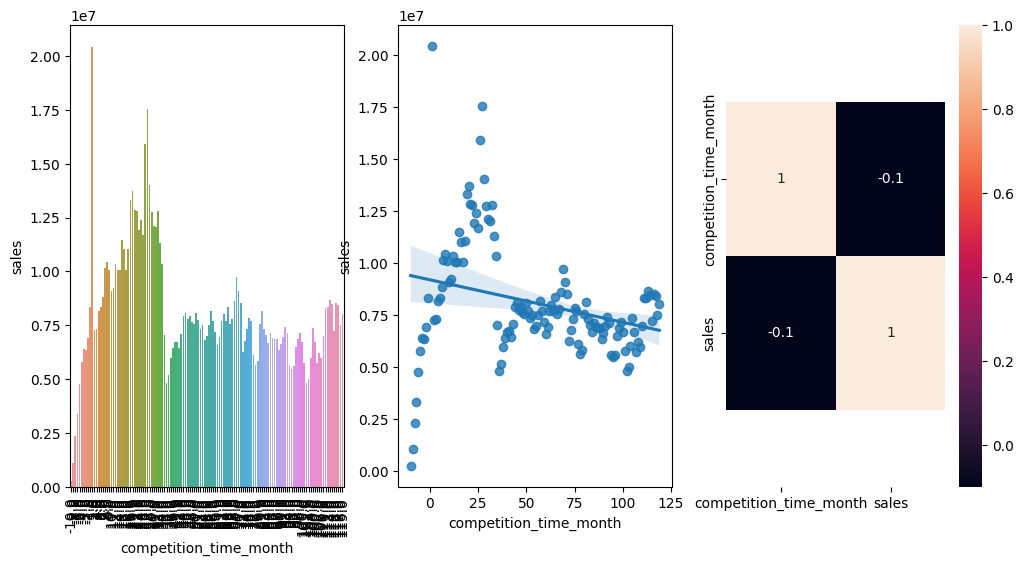

In [135]:
plt.figure(figsize=(12, 6))
plt.subplot( 1, 3, 1 )

aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]
sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

### **H4** Lojas com promoções ativas por mais tempo deveriam vender mais.

**FALSA** Lojas com promocoes ativas por mais tempo vendem menos, depois de um certo periodo de promocao

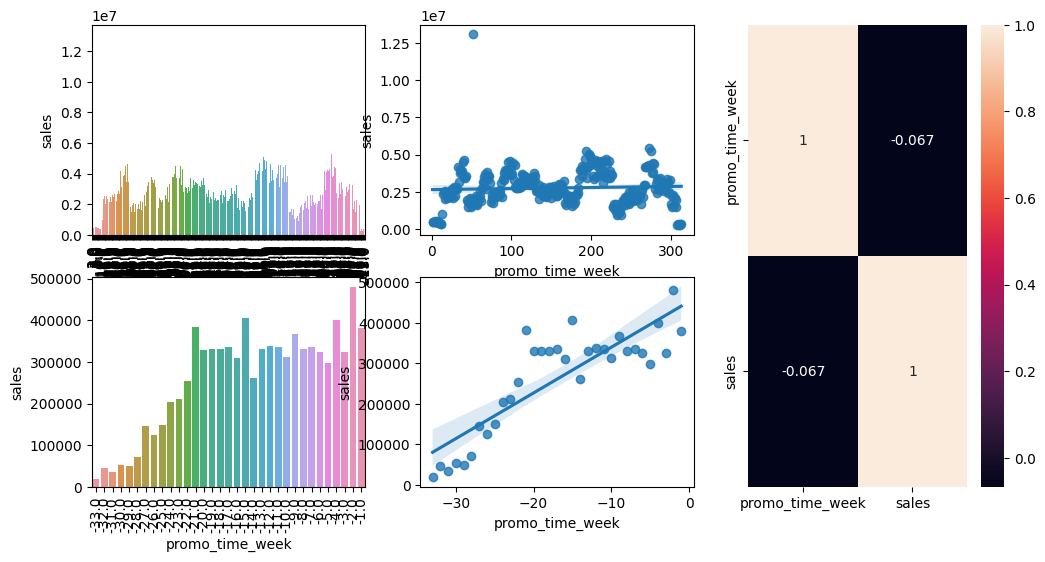

In [136]:
aux1 = df4[['promo_time_week', 'sales']].groupby( 'promo_time_week').sum().reset_index()

plt.figure(figsize=(12, 6))
grid = gridspec.GridSpec( 2, 3 )

plt.subplot( grid[0,0] )
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux2 );

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( grid[1,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H5**. Lojas com mais promoções consecutivas deveriam vender mais.

**FALSA** Lojas com mais promocoes consecutivas vendem menos

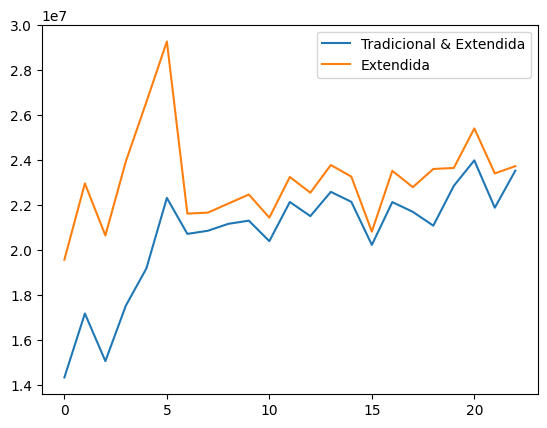

In [108]:

df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index()

aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

### **H6**. Lojas abertas durante o feriado de Natal deveriam vender mais.

**FALSA** Lojas abertas durante o feriado do Natal vendem menos.



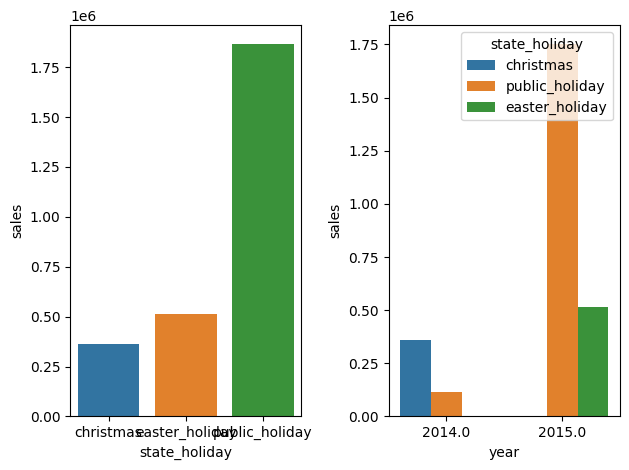

In [137]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

plt.tight_layout()


### **H7**. Lojas deveriam vender mais ao longo dos anos.

**FALSA** Lojas vendem menos ao longo dos anos

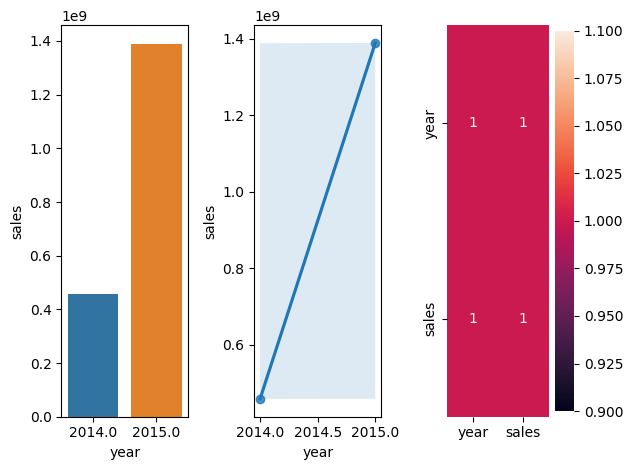

In [138]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.tight_layout()

### **H8**. Lojas deveriam vender mais no segundo semestre do ano.

**FALSA** Lojas vendem menos no segundo semestre do ano

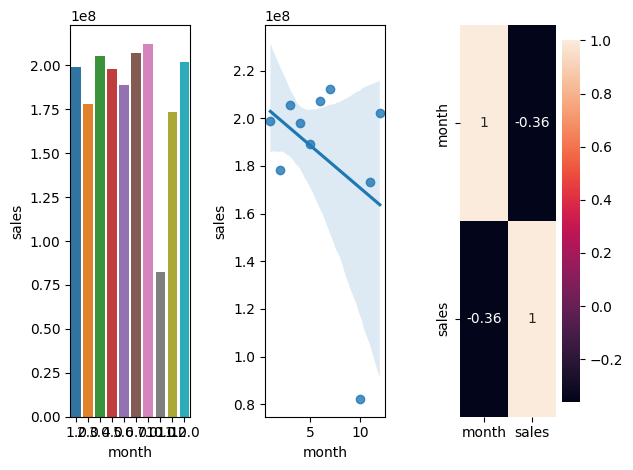

In [139]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.tight_layout()

### **H09**. Lojas deveriam vender mais depois do dia 10 de cada mês.

VERDADEIRA Lojas vendem mais depois do dia 10 de cada mes.

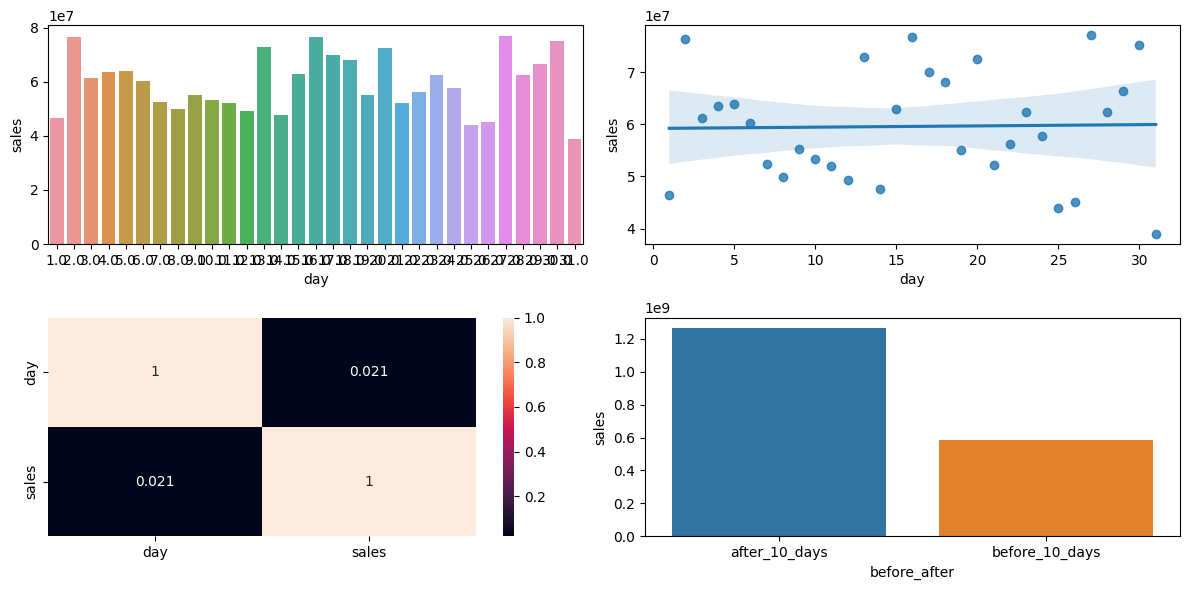

In [141]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()
plt.figure(figsize=(12, 6))
plt.subplot( 2, 2, 1 )
sns.barplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='sales', data=aux2 );

plt.tight_layout()

###  **H10**. Lojas deveriam vender menos aos finais de semana.

**VERDADEIRA** Lojas vendem menos nos final de semana

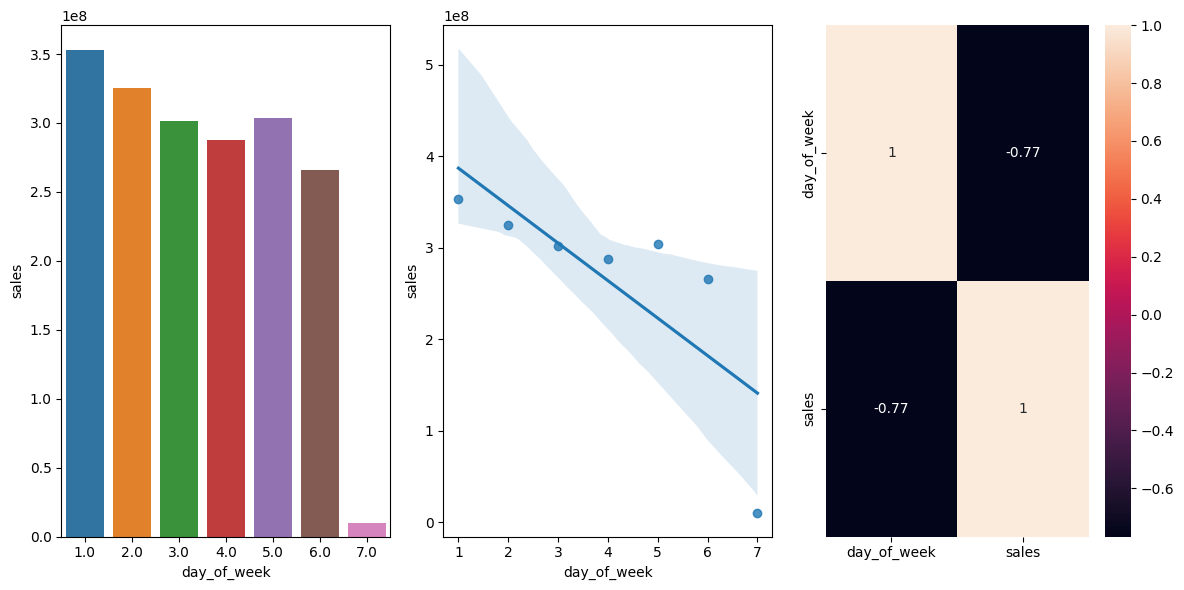

In [142]:
aux1 = df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot( 1, 3, 1 )
sns.barplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.tight_layout()

### **H11**. Lojas deveriam vender menos durante os feriados escolares.

**VERDADEIRA** Lojas vendem menos durante os feriados escolares, menos os meses de Julho e Agosto.

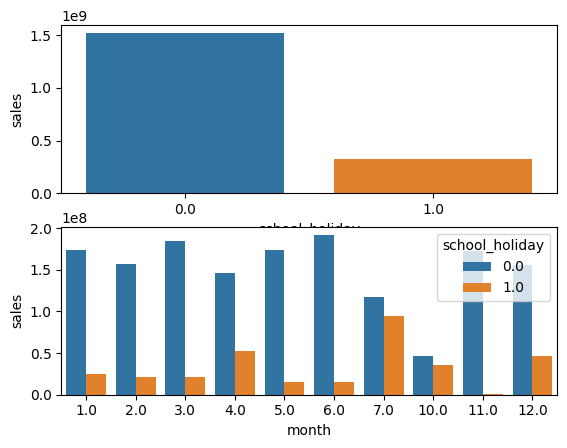

In [143]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 );

aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month','school_holiday'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );

### 4.2.1. Resumo das Hipoteses

In [145]:
tab =[['Hipoteses', 'Conclusão', 'Relevância'],
      ['H1', 'Falsa', 'Baixa'],  
      ['H2', 'Falsa', 'Media'],  
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', 'Falsa', 'Baixa'],
      ['H6', 'Falsa', 'Media'],
      ['H7', 'Falsa', 'Alta'],
      ['H8', 'Falsa', 'Alta'],
      ['H9', 'Verdadeira', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Verdadeira', 'Baixa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusão    Relevância
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           Falsa        Baixa
H6           Falsa        Media
H7           Falsa        Alta
H8           Falsa        Alta
H9           Verdadeira   Alta
H10          Verdadeira   Alta
H11          Verdadeira   Baixa


## 4.3. Analise Multivariada


### 4.3.1. Numerical Attributes


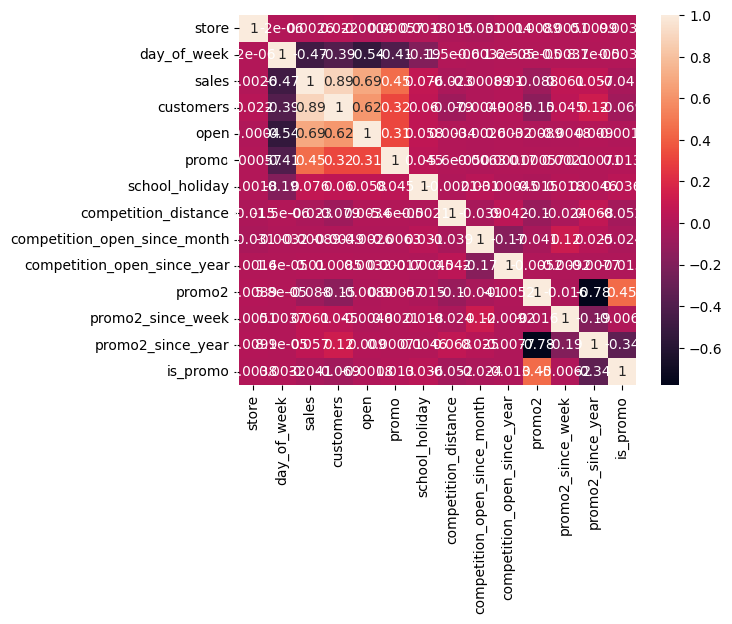

In [146]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### 4.3.2. Categorical Attributes


<Axes: >

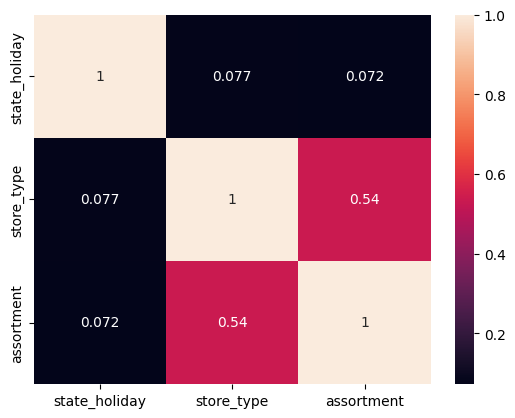

In [149]:
# only categorical data
a = df4.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
               'store_type': [a4, a5, a6],
               'assortment': [a7, a8, a9]  })
d = d.set_index( d.columns )

sns.heatmap( d, annot=True )

# 5.0. PASSO 05 - DATA PREPARATION


In [150]:
df5 = df4.copy()


##5.1. Normalizacao

In [151]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5.0,2015-07-31,5263.0,1.0,regular_day,1.0,c,basic,1270.0,...,0,2015.0,7.0,31.0,31.0,2015-30,2008-09-01,84.0,2015-07-27,0.0
1,2,5.0,2015-07-31,6064.0,1.0,regular_day,1.0,a,basic,570.0,...,1,2015.0,7.0,31.0,31.0,2015-30,2007-11-01,94.0,2010-03-22,279.0
2,3,5.0,2015-07-31,8314.0,1.0,regular_day,1.0,a,basic,14130.0,...,1,2015.0,7.0,31.0,31.0,2015-30,2006-12-01,105.0,2011-03-28,226.0
3,4,5.0,2015-07-31,13995.0,1.0,regular_day,1.0,c,extended,620.0,...,0,2015.0,7.0,31.0,31.0,2015-30,2009-09-01,71.0,2015-07-27,0.0
4,5,5.0,2015-07-31,4822.0,1.0,regular_day,1.0,a,basic,29910.0,...,0,2015.0,7.0,31.0,31.0,2015-30,2015-04-01,4.0,2015-07-27,0.0


##5.2. Rescaling

In [153]:
rs = RobustScaler()
mms = MinMaxScaler()

# competition distance
df5['competition_distance'] = rs.fit_transform( df5[['competition_distance']].values )

# competition time month
df5['competition_time_month'] = rs.fit_transform( df5[['competition_time_month']].values )

# promo time week
df5['promo_time_week'] = mms.fit_transform( df5[['promo_time_week']].values )

# year
df5['year'] = mms.fit_transform( df5[['year']].values )


## 5.3 Padronizacao 

In [154]:

# seleciona apenas as colunas numéricas
numeric_cols = df4.select_dtypes(include=np.number).columns

# cria um objeto StandardScaler
scaler = StandardScaler()

# aplica a padronização nas colunas numéricas
df4[numeric_cols] = scaler.fit_transform(df4[numeric_cols])
